<a href="https://colab.research.google.com/github/nsarache0/Unsupervised-ML/blob/main/PCA%20and%20MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: PCA and Multi - Dimensional Scaling

## OUTLINE:

Data pre-processing, plotting and dimensionality reduction

1. Reading the file
2. Missing Values
3. Impute with scikit-learn
4. Implement imputation with a function
5. Data visualization
6. Standardization
7. Dimensionality reduction
8. Multi-Dimensional Scaling

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

from matplotlib.colors import ListedColormap


RSEED = 8


## DATA PRE-PROCESSING, PLOTTING AND DIMENSIONALITY REDUCTION

We will use **Pima Indians Diabetes Database** that is publicly available and from UCI.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on specific diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The dataset consists of several medical predictors (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

According to the information on the data, it has eight attributes and one binary class. The brief explanation of the attributes are as follows:

- Pregnancies: Number of times pregnant.

- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

- BloodPressure: Diastolic blood pressure (mm Hg).

- SkinThickness: Triceps skin fold thickness (mm).

- Insulin: 2-Hour serum insulin (mu U/ml).

- BMI: Body mass index (weight in kg/(height in m)^2).

- DiabetesPedigreeFunction: Diabetes pedigree function.

- Age: Age (years).

- and we have a binary class which can be 0 (healthy) or 1 (diabetes).

## *1.* Reading the file

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Datasets projects/diabetes.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Taking a good look into the dataset:

In [6]:

data.info()
data.shape
data.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [ ]:

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## *2.* Missing values

### It seems like there is no null data encoded as such.



###  Missing value explanation:
In this case, we assume the missing values  (except 'Pregnancies' and 'Outcomes') are represented with a  0 for this dataset, because it is physiologically impossible to have 0 blood pressure, level of glucose, Skinthickness, insulin, BMI, as well as DiabetesPedigreeFunction.

<ipython-input-7-5e0678102c07>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = mv_counts.index, y = mv_counts.values, palette= 'pastel')


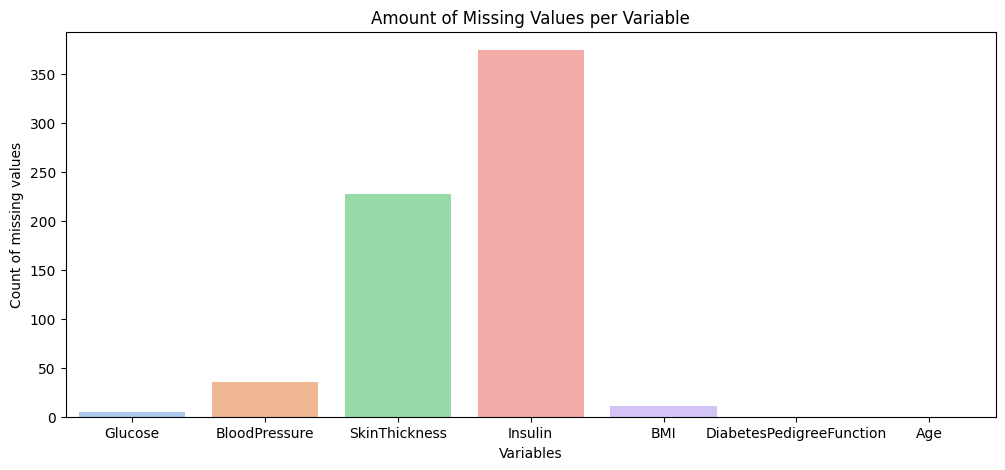

In [7]:

# First we create a new dataframe dropping the variables 'Pregnancies' and ' Outcome'
data_new = data.drop(columns = ['Pregnancies', 'Outcome'])
#then we create a panda series containing the quantity of '0' per variable in the new dataframe
mv_counts= (data_new == 0).sum()
mv_counts
#now, we plot the quantity of '0' found in the new dataset, per variable:
#I prefer to use seaborn 'cause it's more aesthetic
plt.figure(figsize = (12,5))
sns.barplot(x = mv_counts.index, y = mv_counts.values, palette= 'pastel')
plt.xlabel('Variables')
plt.ylabel('Count of missing values')
plt.title("Amount of Missing Values per Variable")
plt.show()

## *3.* Imputing using scikit-learn simple imputer.

We will impute the missing values in the dataset, identified as zero (0), using the mean of each variable and the imputer provided from scikit-learn.

In [8]:
data_imputed = data
#we create a list containing the variables we want to impute, excluding 'Pregnancies' and the label variable
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#we use a new dataframe with the desired variables.
df_part = data_new
imputer = SimpleImputer(missing_values = 0, strategy = 'mean')
imputer.fit(df_part)
data_transformed = imputer.transform(df_part)
data_converted = pd.DataFrame(data_transformed, columns = columns_to_impute)

#after imputing, we use join to have the complete dataset again
data_imputed = data_converted.join(data_imputed[['Pregnancies', 'Outcome']])
#we re order the columns in the dataset:
data_imputed= data_imputed.loc[:, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
data_imputed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1


In [ ]:
#we take a look at the new imputed dataset
data_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# we can see the difference between the imputed dataset and the original dataset containing missing values
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## *4.* Implement imputation with a function:

Now, we want to the exact same process, but without using scikit - learn. We will write a function that imputes the missing values with the mean of each variable.

In [10]:
def imputation(df, columns):

    df = data

    df[columns] = df[columns].replace(0, np.nan)

    for col in columns:
        column_means = df[col].mean()

        df[col].fillna(column_means, inplace = True)


    # we iterate in the column vector to replace the Zeros with the mean value.

    return df
columns = columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [12]:
diabetes_1 = imputation(data, columns)
diabetes_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


We should expect the same results in both imputed dataframes. We can confirm this using the following code:

In [14]:
try:
    np.testing.assert_allclose(data_imputed.values, diabetes_1.values)
    print("result: equal")
except:
    print("result: not equal")

result: equal


If we look at the statistics measures for both datasets, they should be the same.

In [ ]:
diabetes_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## *5.* Data Visualization

We will use the library seaborn to explore the variable 'Glucose'

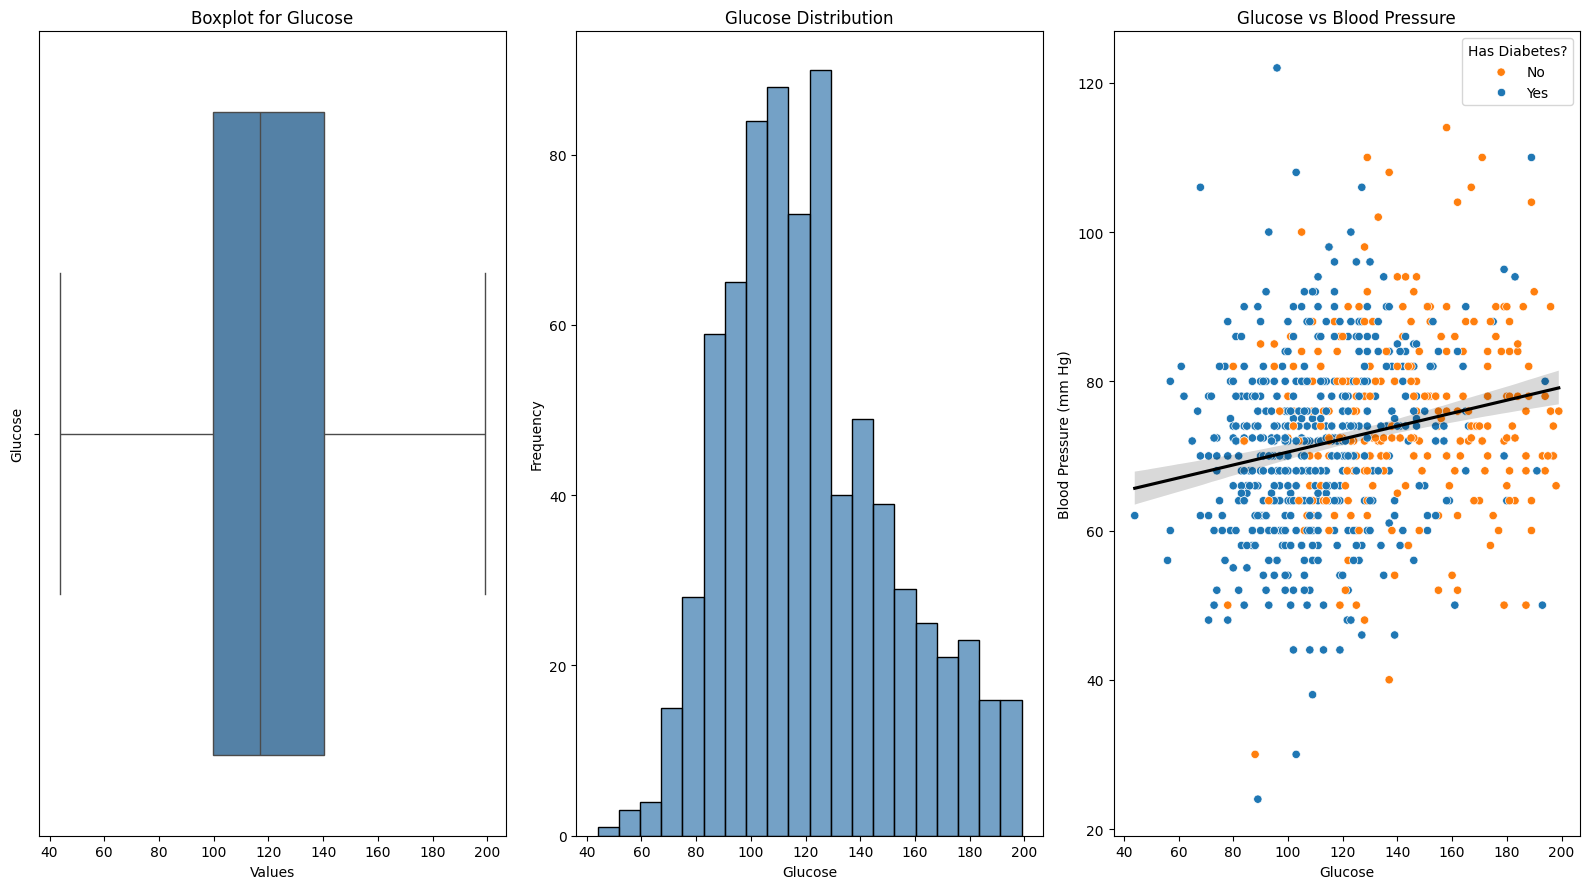

In [ ]:

fig, ax = plt.subplots(1, 3, figsize=(16, 9))

# First subplot
sns.boxplot(x='Glucose', data=data_imputed, color='steelblue', ax=ax[0])
ax[0].set(xlabel='Values', ylabel='Glucose', title='Boxplot for Glucose')
# Second subplot:
sns.histplot(data_imputed['Glucose'], bins=20, kde=False, color='steelblue', ax=ax[1])
ax[1].set(xlabel='Glucose', ylabel='Frequency', title='Glucose Distribution')
# Third subplot:
sns.scatterplot(x='Glucose', y='BloodPressure', hue='Outcome', data=data_imputed, marker='o', ax=ax[2])
new_label = {0: 'No', 1: 'Yes'}
ax[2].legend(title='Has Diabetes?', labels=[new_label[0], new_label[1]])
sns.regplot(x='Glucose', y='BloodPressure', data=data_imputed, color='black', scatter=False, ax=ax[2])
ax[2].set(xlabel='Glucose', ylabel='Blood Pressure (mm Hg)', title='Glucose vs Blood Pressure')
plt.tight_layout()
plt.show()

We want to check for outliers in the variable using a boxplot. It seems that there is no significant noice in this variable.

Text(0.5, 1.0, 'Boxplot for Glucose')

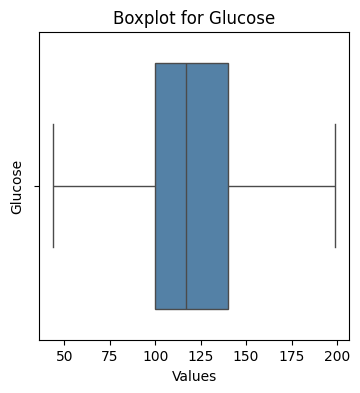

In [20]:
plt.figure(figsize = (4,4))
sns.boxplot(x='Glucose', data=data_imputed, color='steelblue')
plt.xlabel('Values')
plt.ylabel('Glucose')
plt.title('Boxplot for Glucose')

The histogram shows a distribution skewed to the right

Text(0.5, 1.0, 'Glucose Distribution')

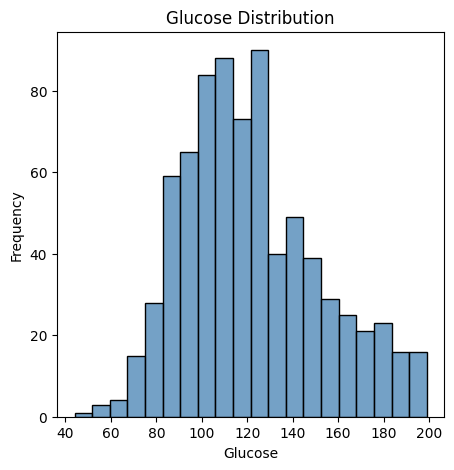

In [23]:
plt.figure(figsize = (5,5))
sns.histplot(data_imputed['Glucose'], bins=20, kde=False, color='steelblue')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Glucose Distribution')

When we plot Glucose against Blood Pressure, we se that the correlation is relatively low (0.22). However, if we draw a regression linea through the data points, we can see that the correlation is low but strong, because the data points are not too separated from the regression line, implying that there is a cohesion.

Pearson correlation coefficient between Glucose and Blood Pressure is: 0.22


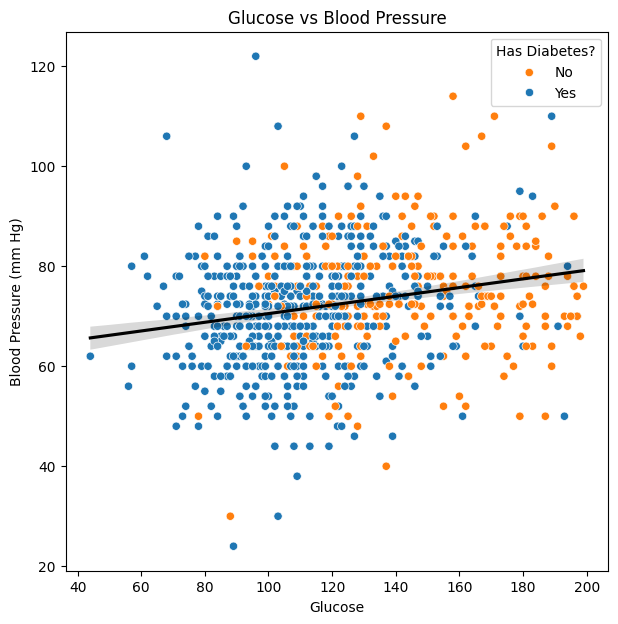

In [32]:
plt.figure(figsize = (7,7))
sns.scatterplot(x='Glucose', y='BloodPressure', hue='Outcome', data=data_imputed, marker='o')
new_label = {0: 'No', 1: 'Yes'}
plt.legend(title='Has Diabetes?', labels=[new_label[0], new_label[1]])
sns.regplot(x='Glucose', y='BloodPressure', data=data_imputed, color='black', scatter=False)
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure (mm Hg)')
plt.title('Glucose vs Blood Pressure')
##correlation coefficient:
correlation = data_imputed['Glucose'].corr(data_imputed['BloodPressure'])
print(f"Pearson correlation coefficient between Glucose and Blood Pressure is:{correlation: .2f}")

### Visualization of the amount of people with diabetes by age range.
We will use the cut function from pandas to generate bins for the age variable: 0-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-100

<ipython-input-33-fb82da33b7e1>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_class = data_imputed.groupby(['age_bins', 'Outcome']).size().unstack(fill_value=0)


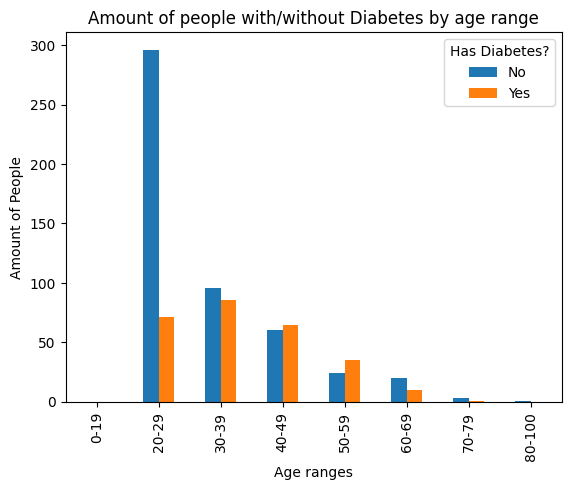

In [33]:
#we define the bins
bins_range = [0, 19, 29, 39, 49, 59, 69, 79, 100]
#then we define the labels for each bin:
bins_label = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-100']
#then we create the new variable using pandas cut:
data_imputed['age_bins'] = pd.cut(data_imputed['Age'], bins = bins_range, labels = bins_label, right = False)
#now we create the new dataframe for plotting:
age_by_class = data_imputed.groupby(['age_bins', 'Outcome']).size().unstack(fill_value=0)
age_by_class
#finally we plot the result using seaborn:
age_by_class.plot(kind='bar', stacked=False)
new_label_1 = {0: 'No', 1: 'Yes'}
plt.xlabel("Age ranges")
plt.ylabel("Amount of People")
plt.title("Amount of people with/without Diabetes by age range")
plt.legend(title='Has Diabetes?', labels=[new_label_1[0], new_label_1[1]])

##finally we drop the age_bins variable from the data_imputed dataframe:
data_imputed = data_imputed.drop(['age_bins'], axis = 1)

### How many people with obesity have diabetes?
BMI index range interpetation:
* BMI < 18.5 : Low weight / malnutrition
* 18.5 < BMI < 24.9 : Normal weight
* 25 < BMI < 29.9 : Overweight
* BMI > 30 : Obesity

<ipython-input-34-15a9593c9f92>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_df = data_imputed.groupby(['weight_status', 'Outcome']).size().unstack(fill_value=0)


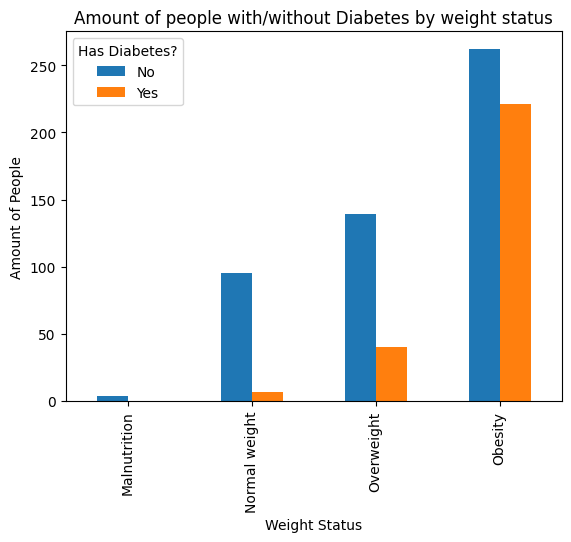

In [34]:
#we first create the bins keeping in mind the min and max for the BMI variable.
bmi_range = [0, 18.5, 25, 30, 68]
#defining the labels:
bmi_label = ['Malnutrition', 'Normal weight', 'Overweight', 'Obesity']
# we create the new variable:
data_imputed['weight_status'] = pd.cut(data_imputed['BMI'], bins = bmi_range, labels = bmi_label, right = False)
#now we create the new dataframe for plotting:
weight_df = data_imputed.groupby(['weight_status', 'Outcome']).size().unstack(fill_value=0)
#then we plot the resulting dataframe:
weight_df.plot(kind='bar', stacked=False)
new_label_2 = {0: 'No', 1: 'Yes'}
plt.xlabel("Weight Status")
plt.ylabel("Amount of People")
plt.title("Amount of people with/without Diabetes by weight status")
plt.legend(title='Has Diabetes?', labels=[new_label_2[0], new_label_2[1]])

##finally we drop the weight_status variable from the data_imputed dataframe:
data_imputed = data_imputed.drop(['weight_status'], axis = 1)

We can see that 221 people that were classified with obesity have indeed Diabetes. We also can see that, as the BMI increases, the amount of people with Diabetes also increases. In the malnutrition category, It was to be expected that there were no people with diabetes

## *6.* Standardization

### Standardization transforms data to have a mean of zero and a standard deviation of 1.
We will use the Simple Imputr from sklearn for the standardization process

In [35]:
#we create an array with only the numercial variables that will be standardize:
numerical_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

x = data_imputed[numerical_variables]

scaler = StandardScaler().fit(x)
data_standardized = scaler.transform(x)
#we create a new dataframe
data_standardized = pd.DataFrame(data_standardized, columns = numerical_variables)
data_standardized
#we store the label in a list.
y = pd.Series(data_imputed['Outcome'])


## *7.* Dimensionality Reduction

## a. PCA

We will reduce the dataset using the first two principal components from PCA.

In [37]:

#step 1:
pca = PCA(n_components= 2)
x_pca = pca.fit_transform(data_standardized)

#step 2:
explained_variance_ratio =  pca.explained_variance_ratio_
#step 3:
df_principal_components = pd.DataFrame(pca.components_, columns = numerical_variables)


Here we can see the loads for each variable, showing how much variance they are aporting providing to the components. The variable that contributes the most is 'Glucose' for the first component.

In [38]:
df_principal_components.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.308371,0.421065,0.378498,0.390485,0.320583,0.390827,0.146564,0.393539
1,0.552069,-0.068170,0.139202,-0.347245,-0.152909,-0.437935,-0.271494,0.511603


The explained variance ratio gives us the conserved variance for the two principal components. In this case, the first component contains the 28% of the total variance and the second one the 18% approx. We are losing a lot of information because we have relatively low amount of independent variables (only 8), and PCA works better with larger datasets.

In [39]:
explained_variance_ratio

array([0.28750131, 0.18411087])

## 8.  Multi-Dimensional Scaling

Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.
In general, MDS is a technique used for analyzing similarity or dissimilarity data and it can help visualize the distances or dissimilarities between sets of objects. Examples of similarity or dissimilarity data might include the distance between pairs of cities, or planets at a particular point in time, or the similarity among groups of people (voters, patients etc).

In these last two excercises we will apply Multi-Dimensional Scaling in our patient dataset using two different versions of the MDS sklearn algorithm.

We will focus on the attribute **dissimilarity** of the MDS object. The attribute can be either 'euclidean' or 'precomputed'. In the former case the euclidean distance between the data points is computed by the algorithm, while in the latter case the user must themeselves compute the dissimilarities between data points and pass this to fit_transform.  



## a. Multi-Dimensional Scaling with SKlearn
we will use 2 components and the euclidian distance for applying MDS.

In [40]:

#step 1:
mds = MDS(n_components=2, random_state=8)
#step 2:
X_2d_a = mds.fit_transform(data_standardized)


Having two components, is possible to make a scatter plot and using the label variable has hue.

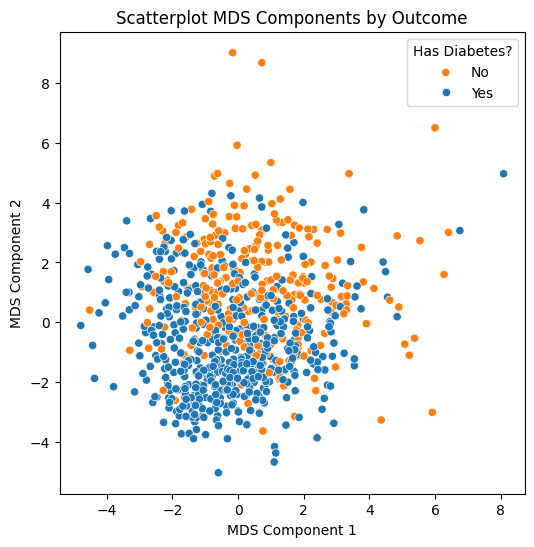

In [ ]:

#step 3:
df_mds = pd.DataFrame({'MDS Component 1': X_2d_a[:,0], 'MDS Component 2': X_2d_a[:, 1], 'Outcome': y})
new_label_3 = {0: 'No', 1: 'Yes'}
#df_mds
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'MDS Component 1', y = 'MDS Component 2', hue = 'Outcome', data = df_mds)
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.title("Scatterplot MDS Components by Outcome")
plt.legend(title='Has Diabetes?', labels=[new_label_3[0], new_label_3[1]])

## b. Multi-Dimensional Scaling - calculating the distance matrix


we will compute the pairwise distances between observations using the euclidean metric.

Note: the resulting plot should look similar with the one above.

In [41]:
from sklearn.metrics import euclidean_distances

In [43]:
#step 1:
distance_matrix = euclidean_distances(data_standardized)
#step 2: the metric is precomputed because we have the distance matrix calculated already
mds2 = MDS(n_components= 2, random_state= 8, dissimilarity= 'precomputed')
#step 3:
X_2d_b = mds2.fit_transform(distance_matrix)

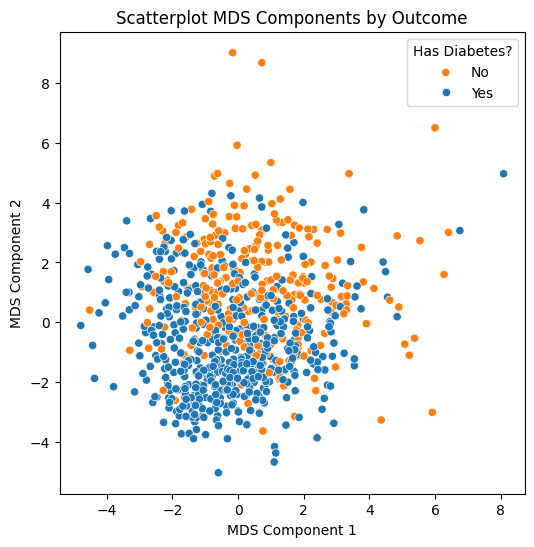

In [44]:
#step 4:
df_mds2 = pd.DataFrame({'MDS Component 1': X_2d_b[:,0], 'MDS Component 2': X_2d_b[:, 1], 'Outcome': y})
new_label_3 = {0: 'No', 1: 'Yes'}
#df_mds
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'MDS Component 1', y = 'MDS Component 2', hue = 'Outcome', data = df_mds2)
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.title("Scatterplot MDS Components by Outcome")
plt.legend(title='Has Diabetes?', labels=[new_label_3[0], new_label_3[1]])

As we can see, the two plots are very similar and the arrays obtained by the MDS are exactly the same, as we prove as follow:

In [45]:
# do not delete this
try:
    np.testing.assert_allclose(X_2d_b, X_2d_a, atol=0.00001)
    print("result: equal")
except:
    print("result: not equal")


result: equal


#9. The End
This is the end of the notebook, I hope it has been useful for your data science projects.

See you in another ocassion!